In [216]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 

In [217]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Preprocessing 

In [218]:
df.shape

(13320, 9)

In [219]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [220]:
df1=df.drop(['availability','society','area_type'],axis='columns')
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [221]:
##Check for null values 
df1.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [222]:
df1=df1.dropna()
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [223]:
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [224]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [225]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [226]:
df1['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [227]:
df1[df1.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [228]:
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [229]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [230]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [231]:
df1[~df1['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [232]:
def convertTonumber(x):
    token=x.split('-')
    if(len(token)==2):
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [233]:
convertTonumber('2100')

2100.0

In [234]:
convertTonumber('2100-2500')

2300.0

In [235]:
convertTonumber('2100 metres')

In [236]:
df1['total_sqft']=df1['total_sqft'].apply(convertTonumber)
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [237]:
df1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

# Feature Engineering and Dimensionality Reduction 

In [238]:
df1['price_per_square_ft']=df1['price']*100000/df1['total_sqft']
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_square_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [239]:
len(df1.location.unique())

1265

In [240]:
df1['location']=df1['location'].apply(lambda x:x.strip())
location_stats=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [241]:
len(location_stats[location_stats<=10])

1017

In [242]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [243]:
df1['location']=df1['location'].apply(lambda x: "Other" if x in location_stats_less_than_10 else x)
len(df1.location.unique())

238

# Outlier Detection and Removal

In [244]:
df1.shape

(12710, 8)

In [245]:
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_square_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [246]:
df1[df1.total_sqft/df1.bhk <300].head()  #Outliers detection

,location,size,total_sqft,bath,balcony,price,bhk,price_per_square_ft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [247]:
df1.shape

(12710, 8)

In [248]:
df2=df1[~(df1.total_sqft/df1.bhk <300)]
df2.shape

(12055, 8)

In [249]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_square_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [250]:
df2.price_per_square_ft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_square_ft, dtype: float64

In [251]:
def remove_ppf_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_square_ft)
        st=np.std(subdf.price_per_square_ft)
        reduced_df=subdf[(subdf.price_per_square_ft >(m-st)) & (subdf.price_per_square_ft <= (m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=False)
    return df_out
df3=remove_ppf_outliers(df2)
df3.shape

(9848, 8)

In [252]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_square_ft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


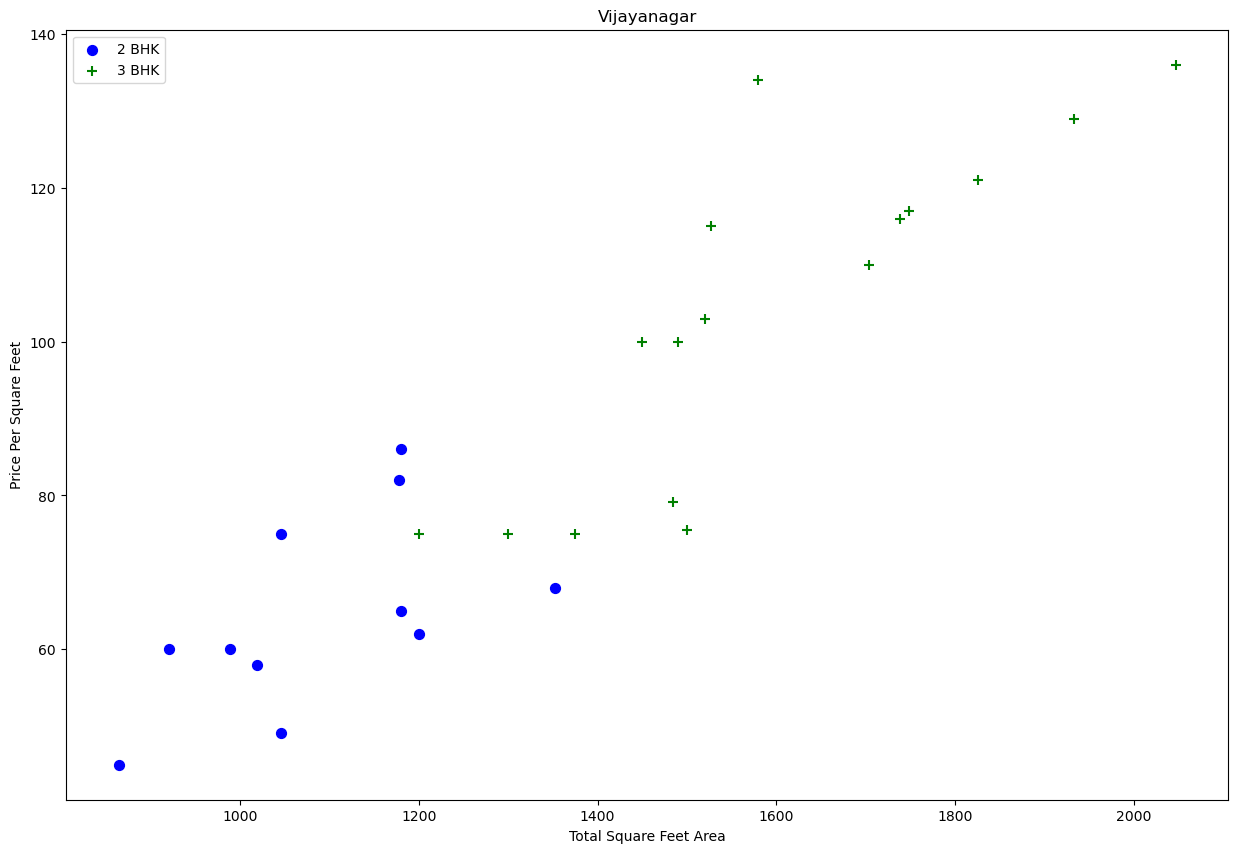

In [263]:
import matplotlib 
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df3,"Vijayanagar")

In [262]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_square_ft),
                'std':np.std(bhk_df.price_per_square_ft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_square_ft <(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df4=remove_bhk_outliers(df3)
df4.shape

(7025, 8)

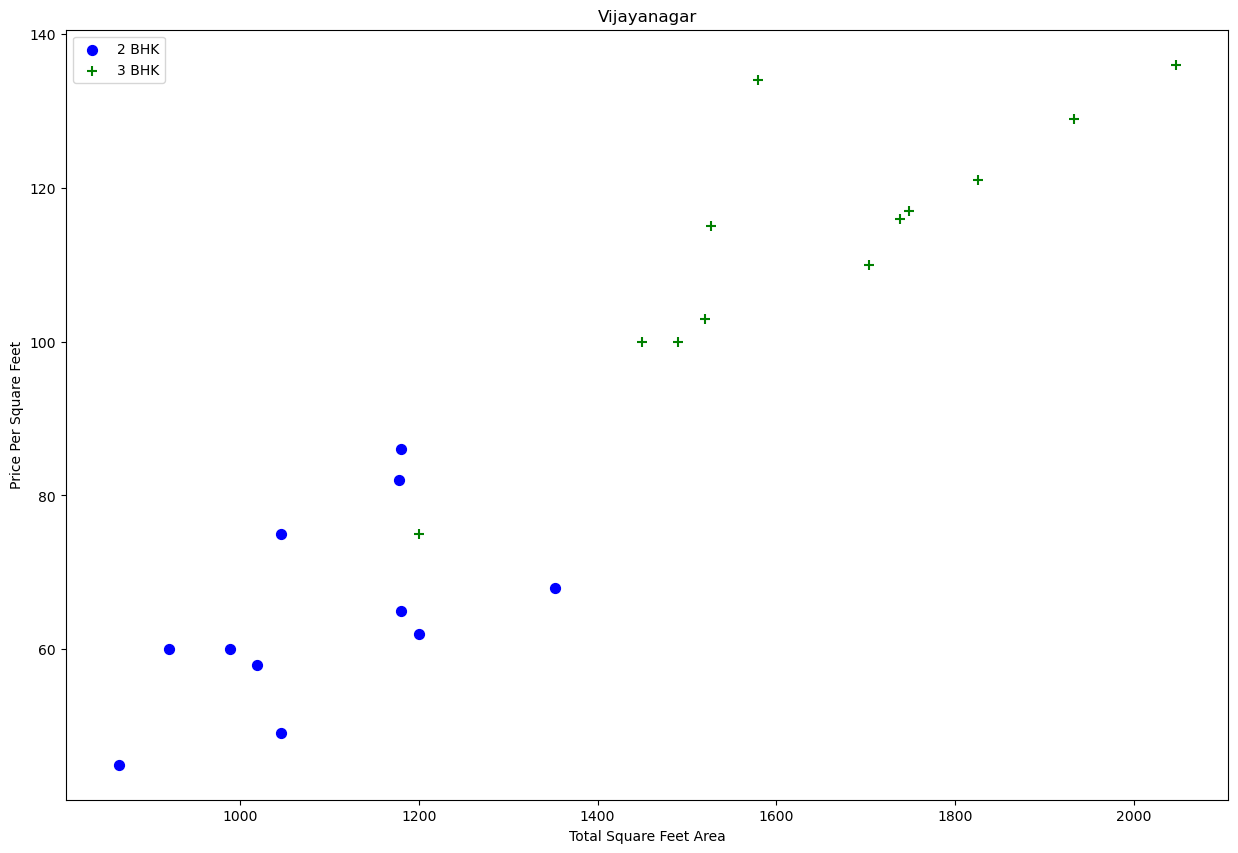

In [264]:
plot_scatter_chart(df4,"Vijayanagar")

Text(0, 0.5, 'Count')

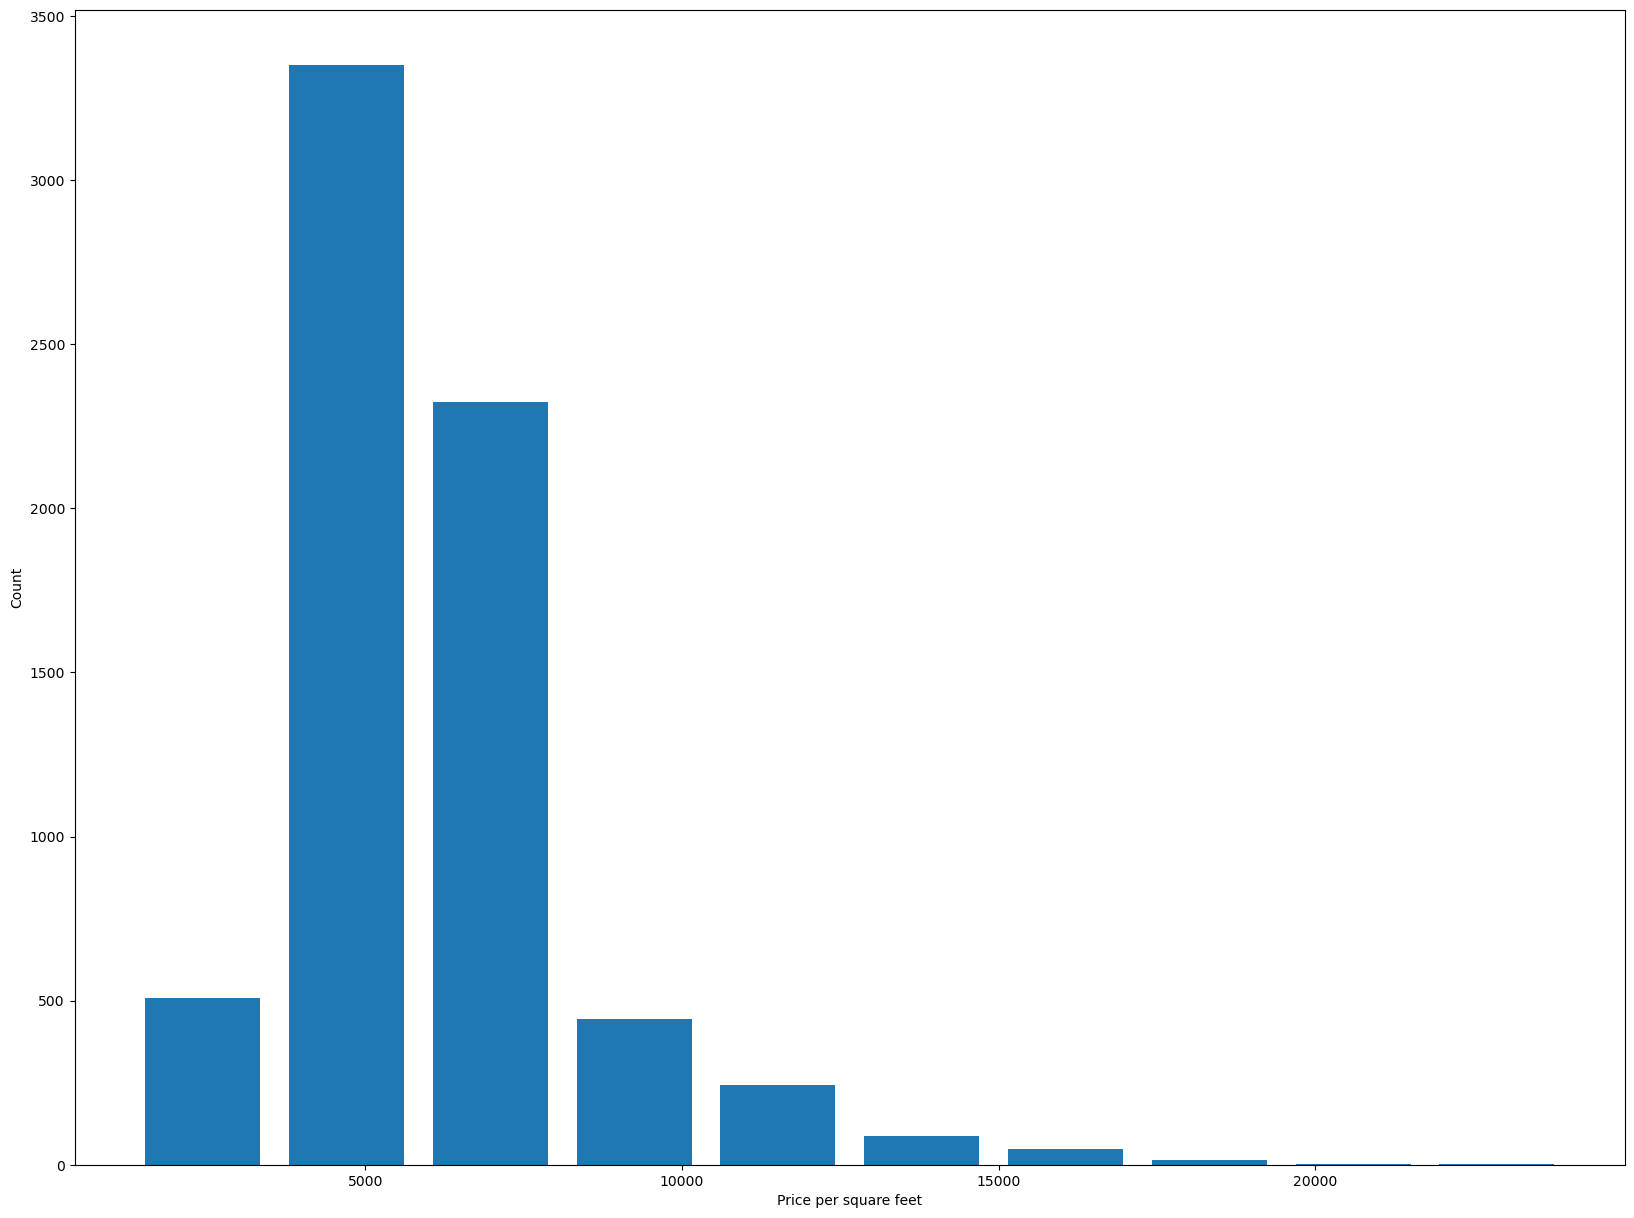

In [255]:
matplotlib.rcParams['figure.figsize']=(20,15)
plt.hist(df4.price_per_square_ft, rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [265]:
df4.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [266]:
df4[df4.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_square_ft
9935,Other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

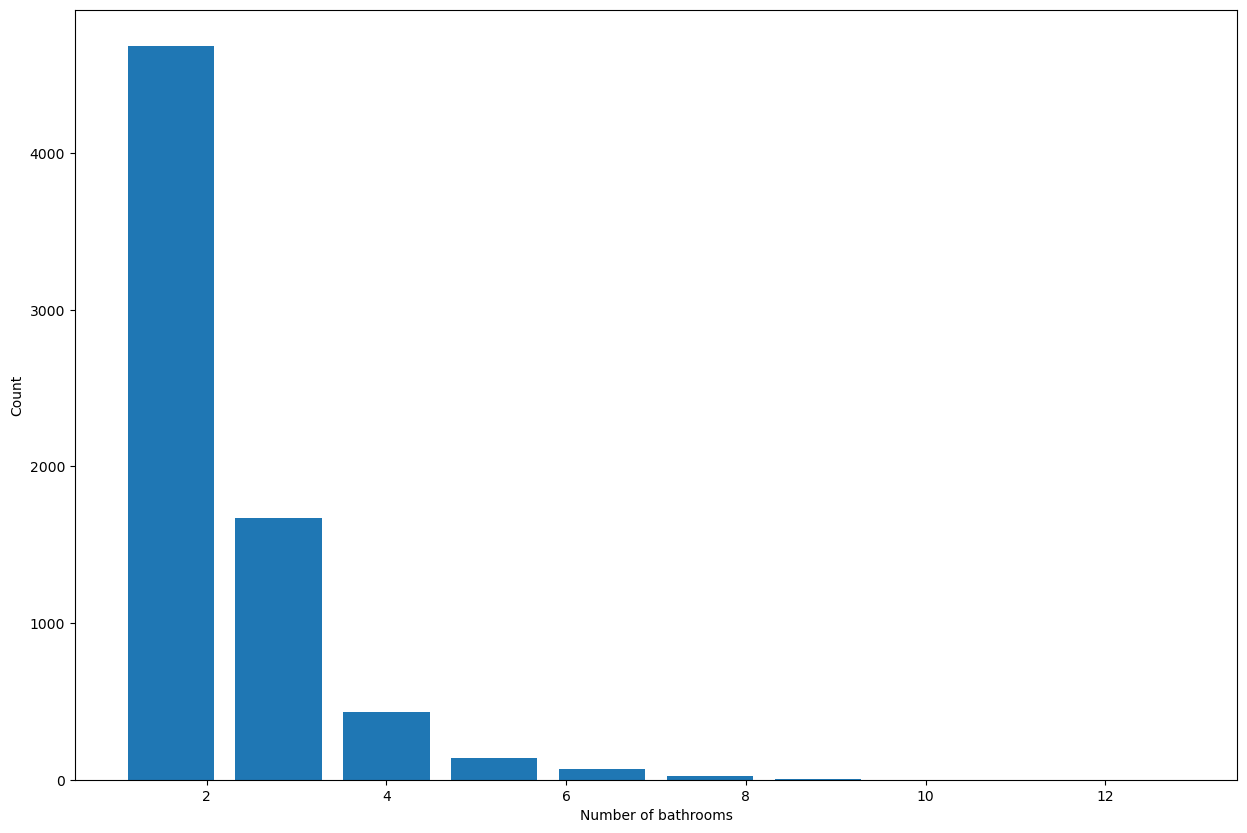

In [267]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [269]:
df4[df4.bath > df4.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_square_ft
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
2620,Other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
12103,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330


In [270]:
df5=df4[df4.bath < df4.bhk+2]
df5.shape

(6958, 8)

In [271]:
df6=df5.drop(['size','price_per_square_ft'],axis='columns')
df6.head()

,location,total_sqft,bath,balcony,price,bhk
210,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
7138,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
7358,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [272]:
df6.shape

(6958, 6)

# Model Building 

In [273]:
dummies=pd.get_dummies(df6.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7138,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7358,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11649,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11785,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
12133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [276]:
df7=pd.concat([df6,dummies],axis='columns')
df7.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7138,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7358,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [277]:
df7=df7.drop('location',axis='columns')
df7.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,1.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1630.0,3.0,2.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,1875.0,2.0,3.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7138,1200.0,2.0,0.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7358,1235.0,2.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [278]:
df7.shape

(6958, 243)

In [279]:
X=df7.drop('price',axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7138,1200.0,2.0,0.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7358,1235.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [280]:
y=df7['price']
y.head()

210     428.0
848     194.0
2152    235.0
7138    130.0
7358    148.0
Name: price, dtype: float64

In [281]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [283]:
from sklearn.linear_model import LinearRegression 

model=LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8552943303975599

# Using cross validation 

In [284]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.86364198, 0.83736172, 0.79147579, 0.88295788, 0.85351791])

In [302]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
def find_best_model_using_GridSearchCV(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
               'n_jobs':[None]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_GridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.845791,{'n_jobs': None}
1,lasso,0.708173,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.773284,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Price Prediction 

In [303]:
def price_predict(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    
    if loc_index >=0:
        x[loc_index]=1;
    
    return model.predict([x])[0]

price_predict('Vijayanagar',500,5,2)
    

16.71696287921816

In [322]:
price_predict('Vijayanagar',800,5,4)

40.532251625532524

In [321]:
price_predict('Indira Nagar',1000,2,4)

164.8426254252501

In [323]:
import pickle 
with open('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(model,f)

In [324]:
import json 

columns={
    'data_columns' : [col.lower() for col in X.columns]
}

with open('Columns.json', "w") as f:
    f.write(json.dumps(columns))